In [2]:
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *
from audio.coders import *
from bitstream import *
from IPython.display import *
import audio.wave as wave

import scipy.io
from scipy.signal import lfilter

In [3]:
def freq(N,Fe=1):
    """ Retourne un vecteur de fréquences normalisées 
    entre -0.5 et 0.5 sur N points """
    return (arange(N)/N-1/2)*Fe

In [4]:
#On souhaite à présent modifier le contenu spectral du signal \(x\) par différents
#filtres numériques de fonction de transfert \(H(z)=B(z)/A(z)\). 
#Une fonction standard Python vous sera très utile :

    #lfilter qui implémente l'équation aux différences~:
    #cette fonction calcule le vecteur y des sorties d'un filtre numérique spécifié
    #par le vecteur \(B\) des coefficients du numérateur \(B(z)\), le vecteur \(A\)
    #des coefficients du dénominateur \(A(z)\), pour un vecteur d'entrées \(x\),
    #suivant l'instruction~: y=filter(B,A,x)

    #freqz qui calcule la réponse fréquentielle \(H\)(e\(^{j2\pi f / Fe})\) en module
    #et phase pour un filtre spécifié par les deux vecteurs \(B\) et \(A\)
    #des coefficients de la fonction de transfert~: freqz(B,A)


In [5]:
N=441000
df = 44100
dt = 1.0 / df
t = r_[0:N] * dt
f= 440

In [6]:
Audio("Liem - If Only (Lehult).wav")

In [7]:
figure()
data1= wave.read("Liem - If Only (Lehult).wav", scale=False)[0]
plot(t, data1)

<IPython.core.display.Javascript object>

In [8]:
import scipy.io
from scipy.signal import lfilter
from audio.filters import *
from audio.fourier import F

Fx = F(data1, dt=dt, power_of_two=True)
f2 = r_[0.0:df/2.0:df/2.0/2**10]
figure()
plot(f2, abs(Fx(f2)))
title('TF du signal (module)')
display(len(f2))
#show()

<IPython.core.display.Javascript object>

1024

In [9]:
import matplotlib.pyplot as plt
import numpy as np
JC=wave.read("JC.wav", scale=False)[0]
fs = df  # Sample rate
T = 1/fs    # Sample period
tau = 5000 # Delay    
a=0.2 # Attenuation factor
# h[n] = dirac[n-L]
h = np.zeros(fs)
h[0]=1
h[tau] = 0.3

# Transfer function H
#freqs = np.arange(0, fs)
#e = np.exp(-1.j*freqs*2*np.pi*tau)

data2=convolve(h,JC)*dt
#data1=data1
# Transfer function H via FFT - same # of bins
#H_FFT = np.fft.fft(h)
#len(data1), len(data2)
data20 = data2[511//2:-(511//2)]
data10 = data1[511//2:-(511//2)]
# Correct comb filter
plt.figure()
plt.plot(data20,'r')
plt.plot(data10,'k')
display(Audio("JC.wav"))
wave.write(data20, "x3.wav", df=df)
display(Audio("x3.wav"))

<IPython.core.display.Javascript object>

array([3.33333333+0.00000000e+00j, 3.33333333+2.48818085e-05j,
       3.33333333+4.97636169e-05j, ..., 2.89127535-1.24021992e+00j,
       3.31774269+2.46772571e-01j, 3.14255041-8.43664747e-01j])

<IPython.core.display.Javascript object>


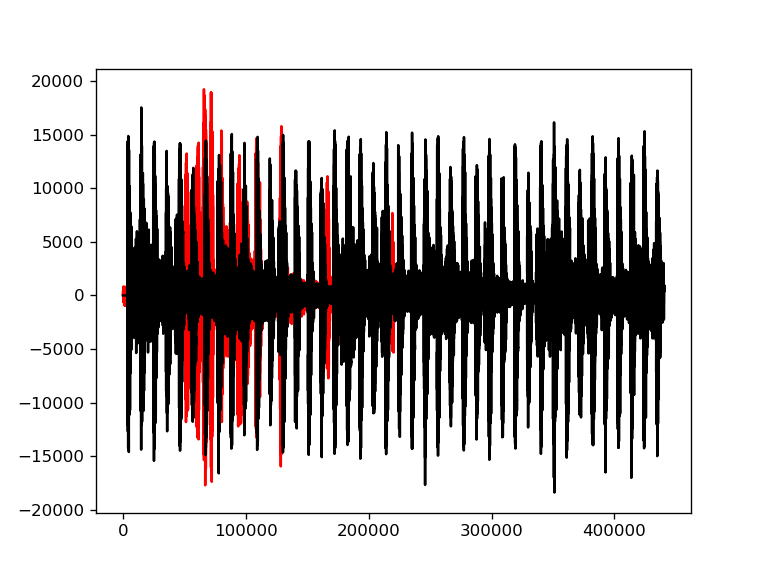

/srv/conda/envs/kernel/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/srv/conda/envs/kernel/lib/python2.7/site-packages/audio/wave.py:178: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.round(data).astype(np.int16)


<IPython.core.display.Javascript object>


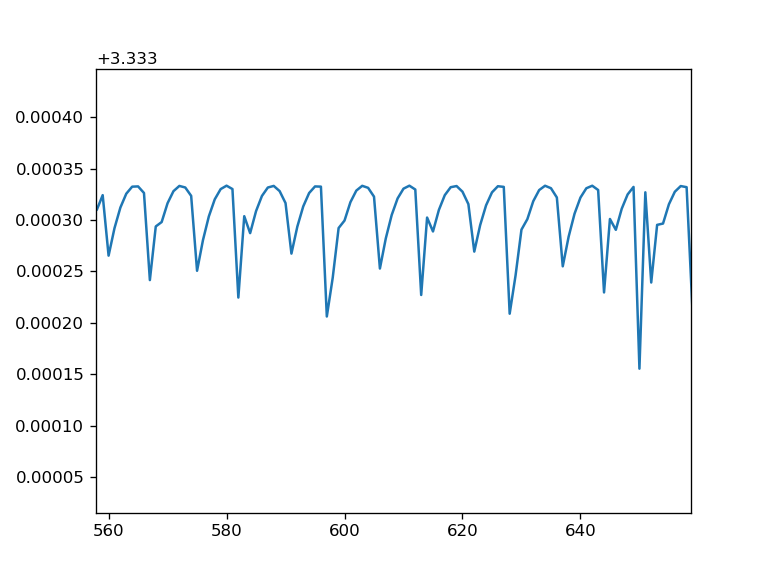

In [11]:
import matplotlib.pyplot as plt
fs = df  # Sample rate
T = 1/fs    # Sample period
tau = 5000000000 # Delay    
g=0.7
n=511
freqs = np.arange(0, fs)
#e = np.exp(-1.j*freqs*2*np.pi*tau)
#f2 = r_[0.0:df/2.0:df/2.0/2**10]
fonction1=1/sqrt(1+(g**2)-(2*g*cos(2*pi*freqs*tau)))
fonction = exp(-1j*2*pi*freqs*tau)/(1-g*exp(-1j*2*pi*freqs*tau))
display(fonction)
ifonction= fft.ifft(fonction)
x5 =  convolve(ifonction,JC)
#x3 = lfilter(fonction,1,data1)
#w,h=scipy.signal.freqz(fonction,1)
#plot(w,h)

#display(fonction)
#display(data1)
#display(inverse)
len(data1)
#, len(x3)
x5 = x5[n//2:-(n//2)]
plt.figure()
plt.plot(x5,'r')
plt.plot(data10,'k')
display(Audio("JC.wav"))
wave.write(x5, "x6.wav", df=df)
display(Audio("x6.wav"))
plt.figure()
plot(freqs,fonction1)

In [ ]:
import matplotlib.pyplot as plt
fs = df  # Sample rate
T = 1/fs    # Sample period
tau = 900000 # Delay    
g=0.7
n=511
freqs = np.arange(0, fs)
#e = np.exp(-1.j*freqs*2*np.pi*tau)
#f2 = r_[0.0:df/2.0:df/2.0/2**10]
fonction1=1/sqrt(1+(g**2)-(2*g*cos(2*pi*freqs*tau)))
fonction3 = exp(-1j*2*pi*freqs*tau)*((1-g*exp(1j*2*pi*freqs*tau))/(1-g*exp(-1j*2*pi*freqs*tau)))
display(fonction)
inv= fft.ifft(fonction3)
conv =  convolve(inv,JC)
#x3 = lfilter(fonction,1,data1)
#w,h=scipy.signal.freqz(fonction,1)
#plot(w,h)

#display(fonction)
#display(data1)
#display(inverse)
#len(data1)
#, len(x3)
conv = conv[n//2:-(n//2)]
plt.figure()
plt.plot(conv,'r')
plt.plot(data10,'k')
plt.figure()
plot(inv)


In [ ]:
def all_pass_filter(signal,delay,g):
    freqs = np.arange(0, fs)
#e = np.exp(-1.j*freqs*2*np.pi*tau)
#f2 = r_[0.0:df/2.0:df/2.0/2**10]
    fonction3 = exp(-1j*2*pi*freqs*delay)*((1-g*exp(1j*2*pi*freqs*delay))/(1-g*exp(-1j*2*pi*freqs*delay)))
    inv= fft.ifft(fonction3)
    return convolve(inv,signal)

In [ ]:
p1=all_pass_filter(JC,500,0.7)
p2=all_pass_filter(JC,5000,0.7)
p3=all_pass_filter(JC,10000,0.7)
p4=all_pass_filter(JC,15000,0.7)

In [ ]:
JC=JC[0:220000]
p11=p1[0:220000]
p21=p2[0:220000]
p31=p3[0:220000]
p41=p4[0:220000]
JC1= JC+p11+p21+p31+p41
wave.write(JC1,"JC1.wav")
display(Audio("JC.wav"))
display(Audio("JC1.wav"))

In [ ]:
p6=all_pass_filter(JC1,50000,0.7)
p7=all_pass_filter(p7,50000,0.7)
wave.write(JC1,"JC1.wav")
display(Audio("JC.wav"))
display(Audio("p7.wav"))